In [59]:
# Standard Imports
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

In [8]:
# Performance
from time import time

In [ ]:
# Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier

In [9]:
# Helper
from sklearn.feature_selection import RFE
from sklearn import metrics

In [10]:
# Load the Data
train = pd.read_csv('input/train2.csv')
test = pd.read_csv('input/test2.csv')

In [14]:
train = train.drop('PassengerId', axis = 1)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 888
Data columns (total 8 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
Gender      889 non-null int64
Port        889 non-null float64
AgeFill     889 non-null float64
dtypes: float64(3), int64(5)
memory usage: 62.5 KB


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 416
Data columns (total 8 columns):
PassengerId    417 non-null int64
Pclass         417 non-null int64
SibSp          417 non-null int64
Parch          417 non-null int64
Fare           417 non-null float64
Gender         417 non-null int64
Port           417 non-null int64
AgeFill        417 non-null float64
dtypes: float64(2), int64(6)
memory usage: 29.3 KB


# Recursive feature elimination

Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and weights are assigned to each one of them. Then, features whose absolute weights are the smallest are pruned from the current set features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

In [50]:
# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression()
# create the RFE model and 
# rank all features, i.e continue the elimination until the last one
rfe = RFE(model, n_features_to_select=1, step = 1)
rfe = rfe.fit(train.iloc[0::, 1::], train.iloc[0::, 0])

In [51]:
feature_names = list(train.columns.values[1::]) # don't include first col 'survived'
print("Features sorted by their rank:")
print(sorted(zip(rfe.ranking_, feature_names)))

Features sorted by their rank:
[(1, 'Gender'), (2, 'Pclass'), (3, 'Port'), (4, 'SibSp'), (5, 'AgeFill'), (6, 'Parch'), (7, 'Fare')]


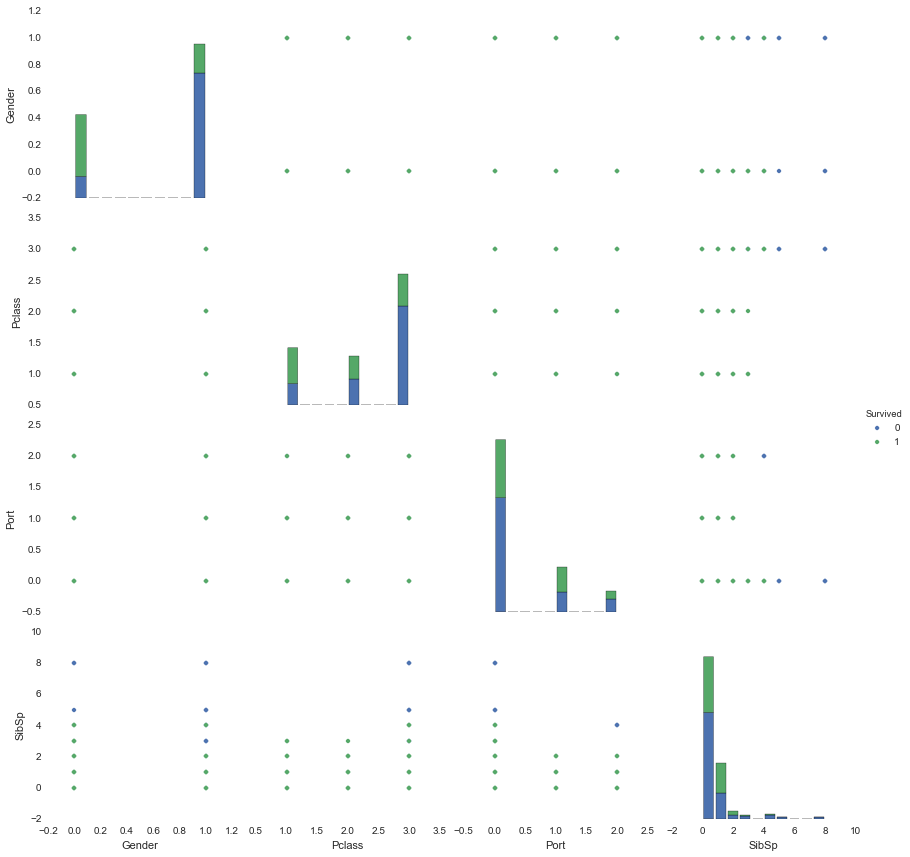

In [69]:
plt.figure()
sns.pairplot(train, vars=["Gender","Pclass","Port", "SibSp"],
             hue="Survived", dropna=True)

In [58]:
train['Port'][0:10]

0    0
1    1
2    0
3    0
4    0
5    2
6    0
7    0
8    0
9    1
Name: Port, dtype: float64

# Extra Trees Classifier

This class implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting.

In [55]:
model = ExtraTreesClassifier()
model.fit(train.iloc[0::, 1::], train.iloc[0::, 0])

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [56]:
# display the relative importance of each attribute
print(sorted(zip(model.feature_importances_, feature_names), reverse=True))

[(0.28019824384516895, 'Gender'), (0.26384435436031595, 'Fare'), (0.24245158231180061, 'AgeFill'), (0.10159470714358713, 'Pclass'), (0.042450458896792623, 'Parch'), (0.039806342354379264, 'SibSp'), (0.02965431108795542, 'Port')]


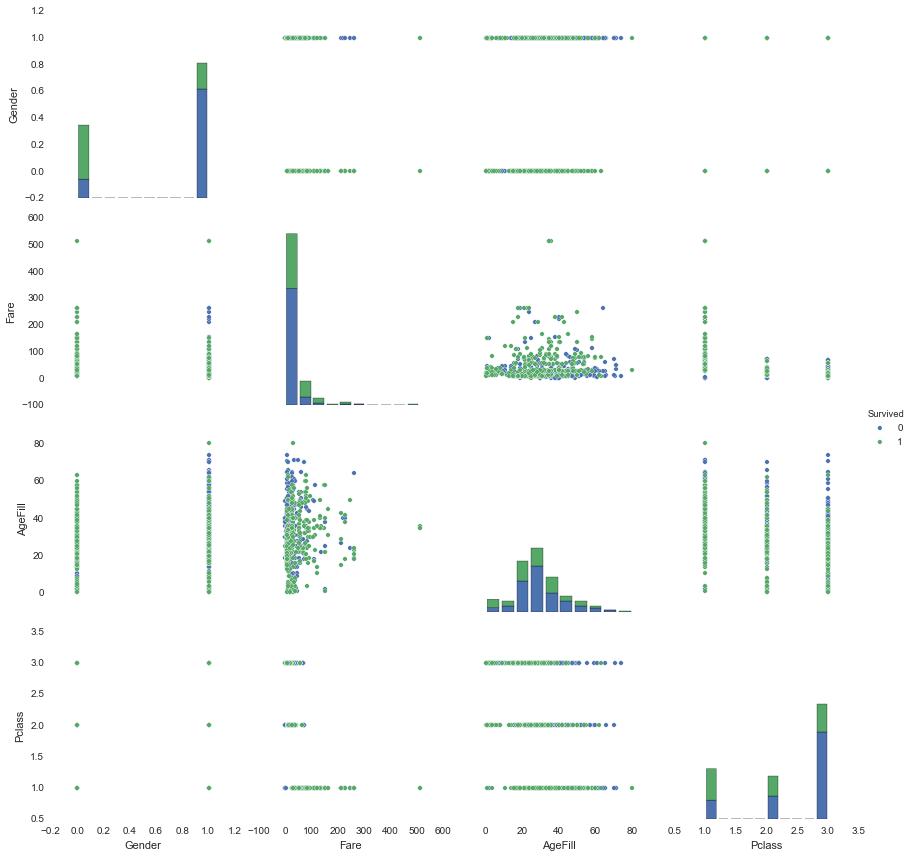

In [68]:
plt.figure()
sns.pairplot(train, vars=["Gender","Fare","AgeFill", "Pclass"],
             hue="Survived", dropna=True)